In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [2]:
def load_obj(name ):
    with open('ttt/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [24]:
results = load_obj("results")

In [25]:
hidden_units = []

In [26]:
def get_avg(list_,n_episodes):
    avg = np.abs(np.array(list_[:-n_episodes]).mean())
    return avg

In [69]:
def get_avgs(list_, n_samples=250):
    avgs = np.array(list_).reshape(-1, n_samples).mean(axis=1)
    return avgs

In [27]:
all_losses = []
all_returns = []
for hidden_unit, result in results.items():
    hidden_units.append(hidden_unit)
    losses = result["loss"]
    avg_reward = result["return"][-1]
    all_returns.append(avg_reward)
    avg_loss = get_avg(losses, 100)
    all_losses.append(avg_loss)

In [28]:
print len(hidden_units)
print len(all_losses)

17
17


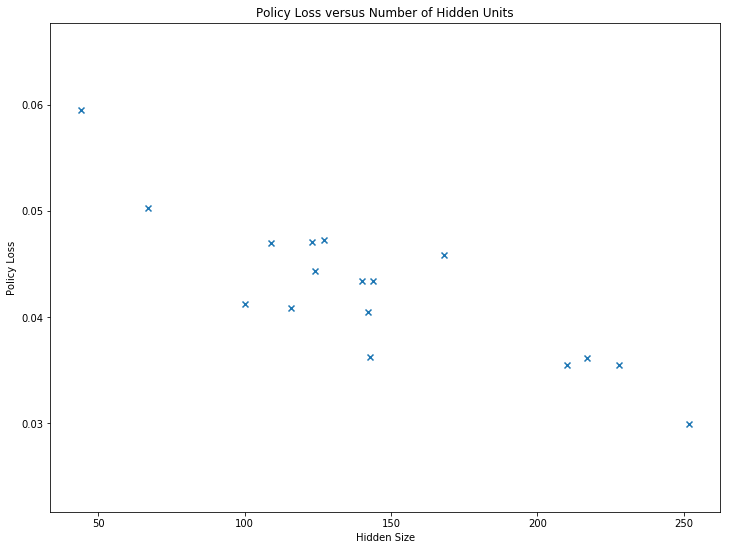

In [30]:
plt.figure(figsize=(12,9))
plt.xlabel("Hidden Size")
plt.ylabel("Policy Loss")
plt.title("Policy Loss versus Number of Hidden Units")
plt.scatter(hidden_units, all_losses, marker="x")
plt.savefig("figures/hidden_units_loss.png", dpi=300, bbox_inches="tight")

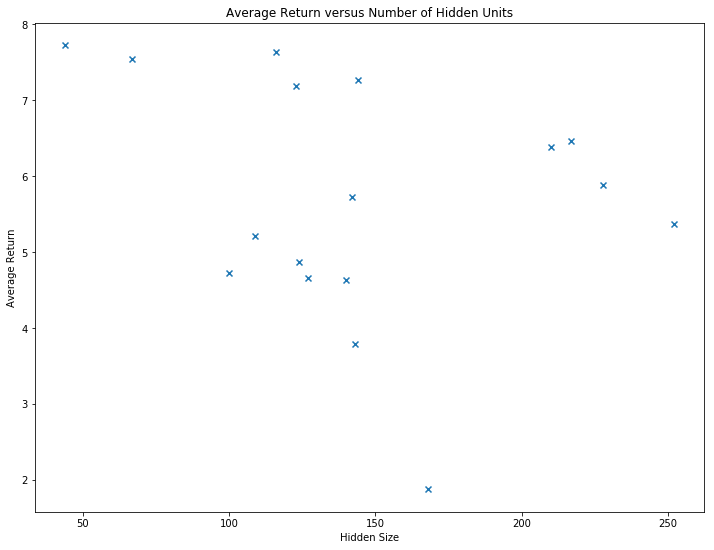

In [31]:
plt.figure(figsize=(12,9))
plt.xlabel("Hidden Size")
plt.ylabel("Average Return")
plt.title("Average Return versus Number of Hidden Units")
plt.scatter(hidden_units, all_returns, marker="x")
plt.savefig("figures/hidden_units_returns.png", dpi=300, bbox_inches="tight")

In [200]:
results_single_64 = load_obj("hidden_units_single_64")

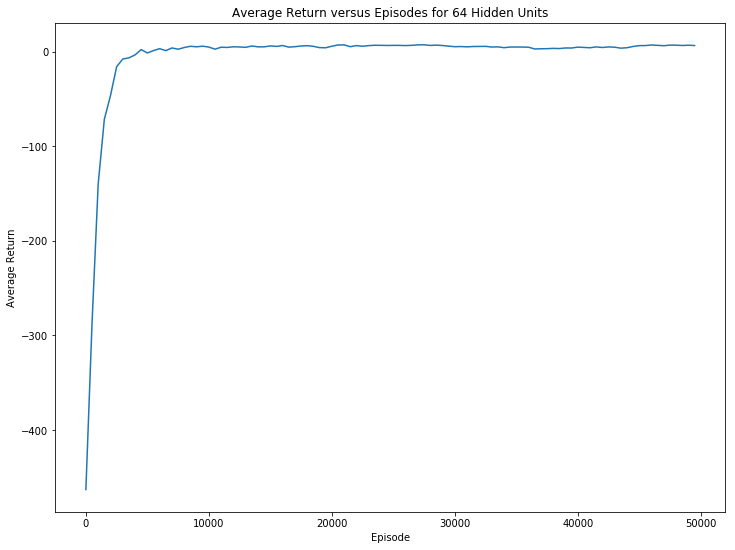

In [201]:
plt.figure(figsize=(12,9))
episodes = range(1, 50001, 500)
plt.xlabel("Episode")
plt.ylabel("Average Return")
plt.title("Average Return versus Episodes for 64 Hidden Units")
plt.plot(episodes, results_single_64['return'])
plt.savefig("figures/return_learning_64.png", dpi=300, bbox_inches="tight")

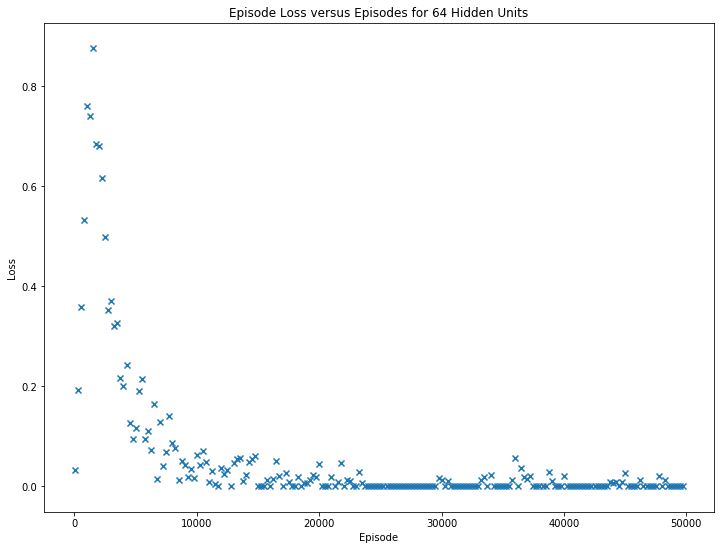

In [202]:
plt.figure(figsize=(12,9))
episodes = range(1, 50001, 250)
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.title("Episode Loss versus Episodes for 64 Hidden Units")
plt.scatter(episodes, np.abs(get_avgs(results_single_64['loss'])), marker='x')
plt.savefig("figures/loss_curve_64.png", dpi=300, bbox_inches="tight")

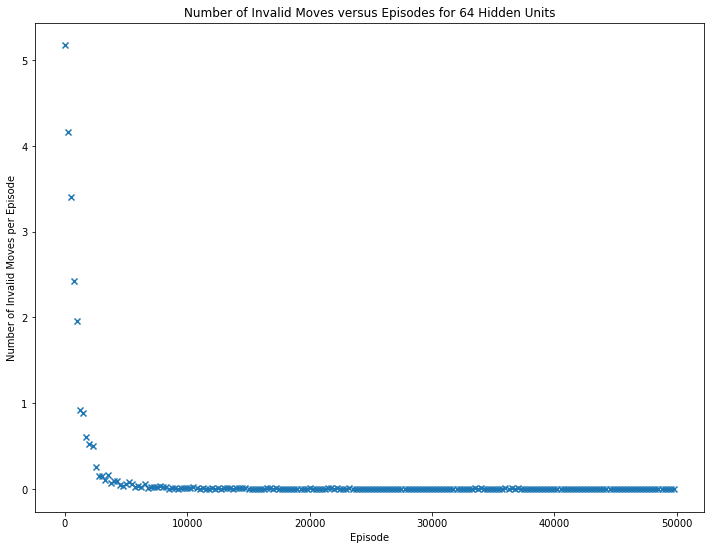

In [203]:
plt.figure(figsize=(12,9))
episodes = range(1, 50001, 250)
plt.xlabel("Episode")
plt.ylabel("Number of Invalid Moves per Episode")
plt.title("Number of Invalid Moves versus Episodes for 64 Hidden Units")
plt.scatter(episodes, get_avgs(results_single_64['invalid']), marker='x')
plt.savefig("figures/invalid_curve_64.png", dpi=300, bbox_inches="tight")

In [204]:
results_single_256 = load_obj("hidden_units_single_256")

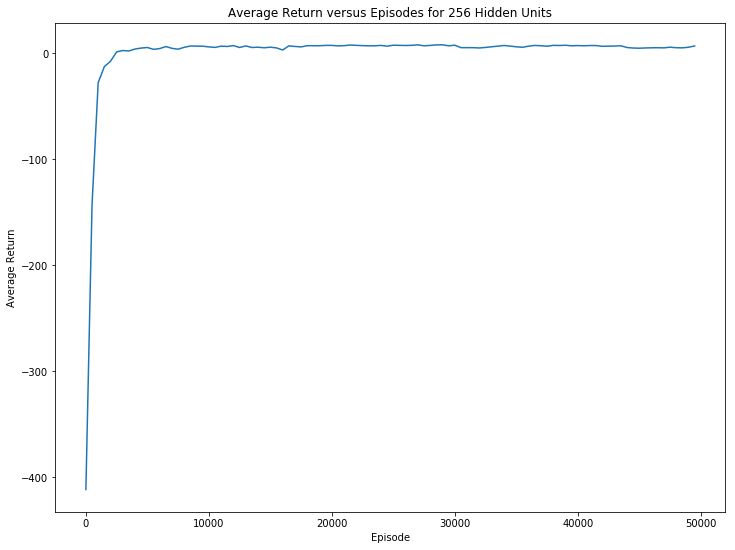

In [205]:
plt.figure(figsize=(12,9))
episodes = range(1, 50001, 500)
plt.xlabel("Episode")
plt.ylabel("Average Return")
plt.title("Average Return versus Episodes for 256 Hidden Units")
plt.plot(episodes, results_single_256['return'])
plt.savefig("figures/return_learning_256.png", dpi=300, bbox_inches="tight")

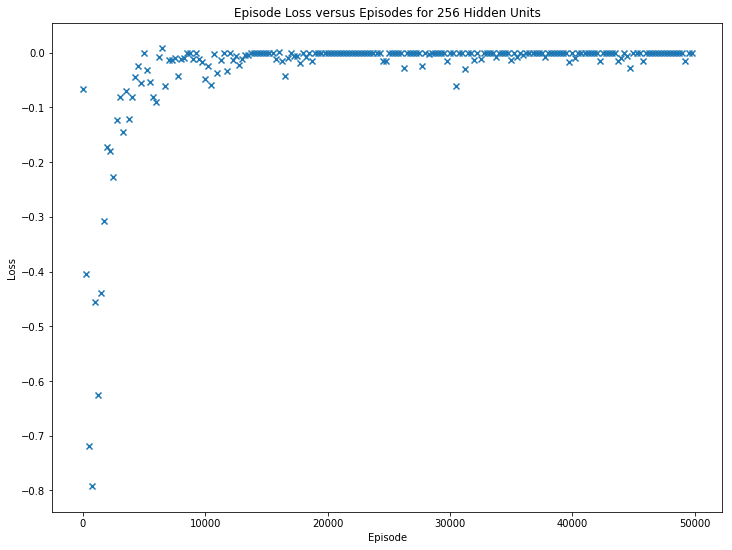

In [206]:
plt.figure(figsize=(12,9))
episodes = range(1, 50001, 250)
plt.xlabel("Episode")
plt.ylabel("Loss")
plt.title("Episode Loss versus Episodes for 256 Hidden Units")
plt.scatter(episodes, get_avgs(results_single_256['loss']), marker='x')
plt.savefig("figures/loss_curve_256.png", dpi=300, bbox_inches="tight")

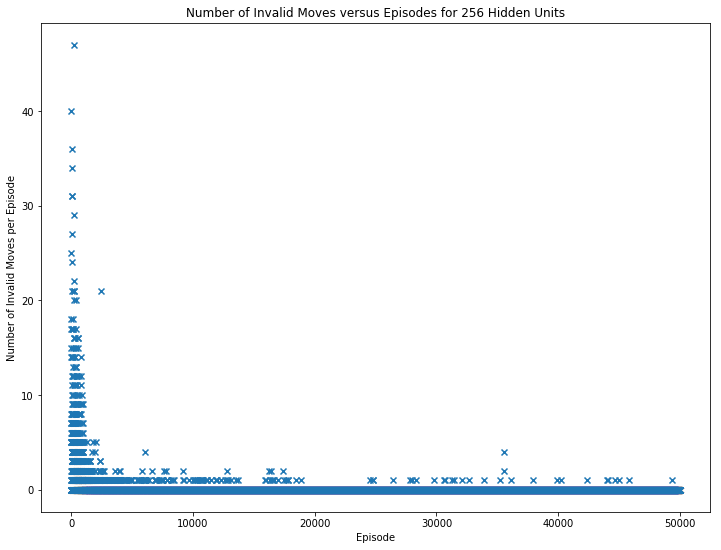

In [207]:
plt.figure(figsize=(12,9))
episodes = range(1, 50001)
plt.xlabel("Episode")
plt.ylabel("Number of Invalid Moves per Episode")
plt.title("Number of Invalid Moves versus Episodes for 256 Hidden Units")
plt.scatter(episodes, np.abs(results_single_256['invalid']), marker='x')
plt.savefig("figures/invalid_curve_256.png", dpi=300, bbox_inches="tight")

In [208]:
results_single_128 = load_obj("hidden_units_single_128")
results_single_32 = load_obj("hidden_units_single_32")

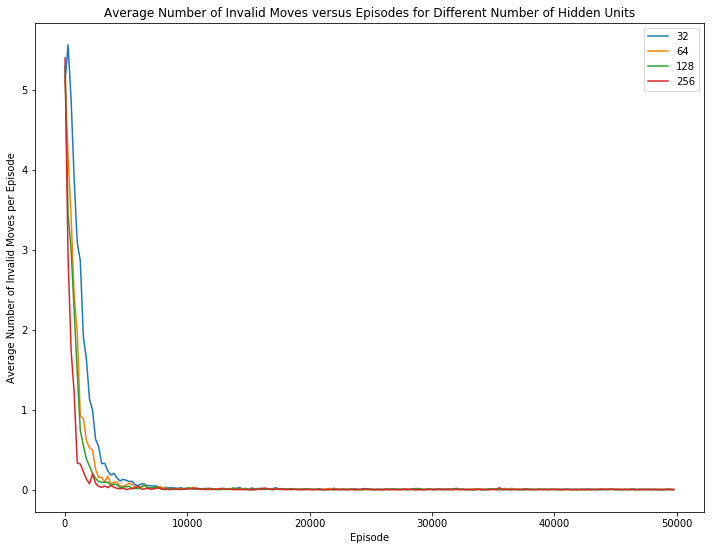

In [209]:
plt.figure(figsize=(12,9))
episodes = range(1, 50001, 250)
plt.xlabel("Episode")
plt.ylabel("Average Number of Invalid Moves per Episode")
plt.title("Average Number of Invalid Moves versus Episodes for Different Number of Hidden Units")
plt.plot(episodes, get_avgs(results_single_32['invalid']), label='32')
plt.plot(episodes, get_avgs(results_single_64['invalid']), label='64')
plt.plot(episodes, get_avgs(results_single_128['invalid']), label='128')
plt.plot(episodes, get_avgs(results_single_256['invalid']), label='256')
plt.legend()
plt.savefig("figures/invalid_curve.png", dpi=300, bbox_inches="tight")

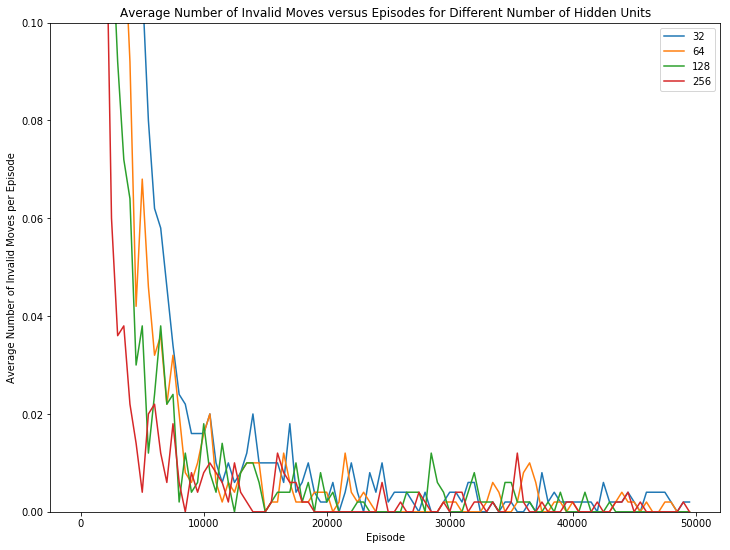

In [210]:
plt.figure(figsize=(12,9))
n_samples = 500
episodes = range(1, 50001, n_samples)
plt.xlabel("Episode")
plt.ylabel("Average Number of Invalid Moves per Episode")
plt.ylim(0, 0.1)
plt.title("Average Number of Invalid Moves versus Episodes for Different Number of Hidden Units")
plt.plot(episodes, get_avgs(results_single_32['invalid'], n_samples), label='32')
plt.plot(episodes, get_avgs(results_single_64['invalid'], n_samples), label='64')
plt.plot(episodes, get_avgs(results_single_128['invalid'], n_samples), label='128')
plt.plot(episodes, get_avgs(results_single_256['invalid'], n_samples), label='256')
plt.legend()
plt.savefig("figures/invalid_curve_close.png", dpi=300, bbox_inches="tight")

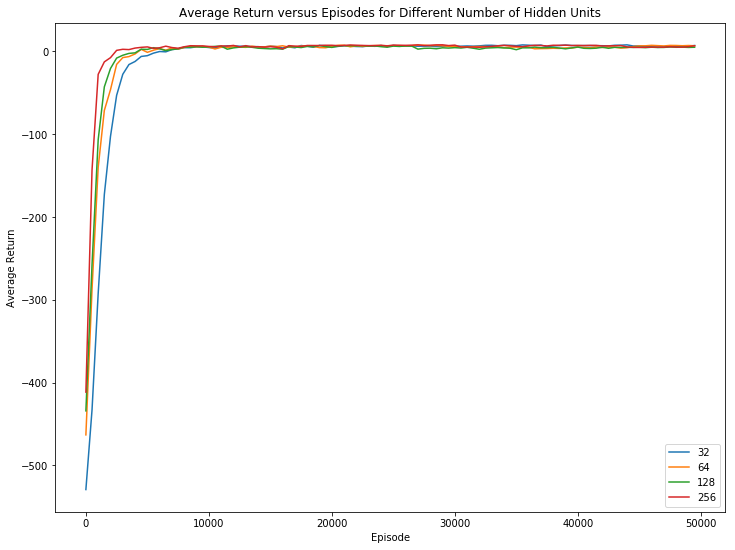

In [211]:
plt.figure(figsize=(12,9))
episodes = range(1, 50001, 500)
plt.xlabel("Episode")
plt.ylabel("Average Return")
plt.title("Average Return versus Episodes for Different Number of Hidden Units")
plt.plot(episodes, results_single_32['return'], label='32')
plt.plot(episodes, results_single_64['return'], label='64')
plt.plot(episodes, results_single_128['return'], label='128')
plt.plot(episodes, results_single_256['return'], label='256')
plt.legend()
plt.savefig("figures/return_learning.png", dpi=300, bbox_inches="tight")

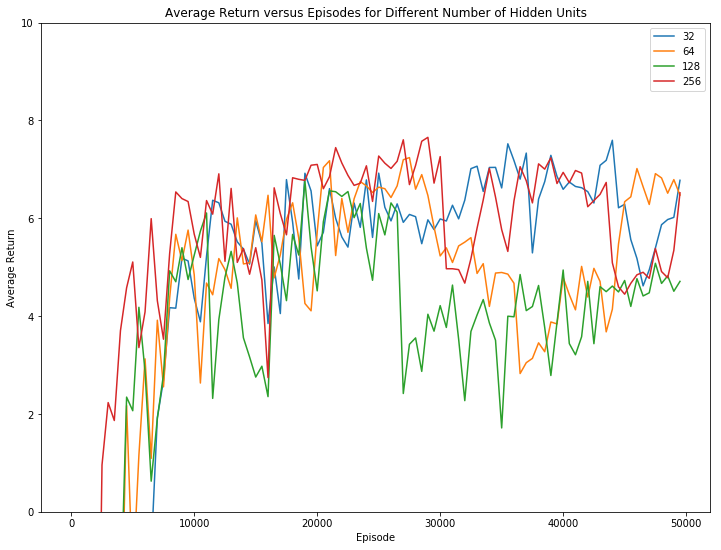

In [212]:
plt.figure(figsize=(12,9))
episodes = range(1, 50001, 500)
plt.xlabel("Episode")
plt.ylabel("Average Return")
plt.ylim(0, 10)
plt.title("Average Return versus Episodes for Different Number of Hidden Units")
plt.plot(episodes, results_single_32['return'], label='32')
plt.plot(episodes, results_single_64['return'], label='64')
plt.plot(episodes, results_single_128['return'], label='128')
plt.plot(episodes, results_single_256['return'], label='256')
plt.legend()
plt.savefig("figures/return_learning_close.png", dpi=300, bbox_inches="tight")

In [219]:
ratio_results = results_single_32['ratio']

In [220]:
win = [result['win'] for result in ratio_results]
lose = [result['lose'] for result in ratio_results]
tie = [result['tie'] for result in ratio_results]
episodes = range(1, 101)

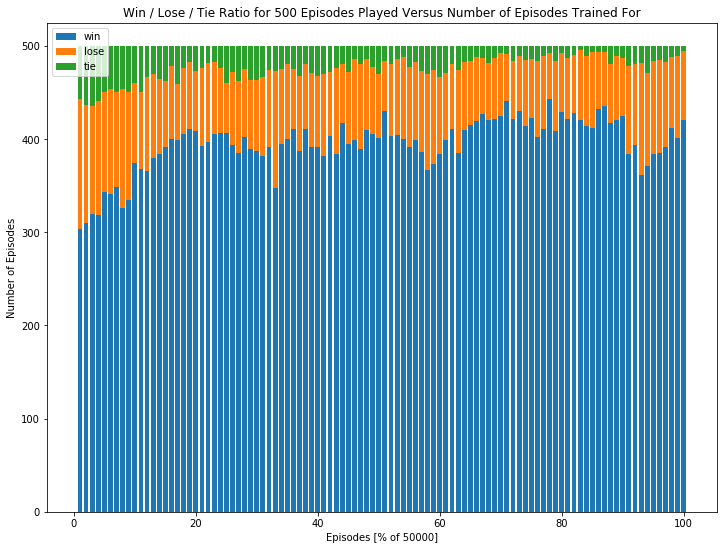

In [221]:
plt.figure(figsize=(12,9))
plt.xlabel("Episodes [% of 50000]")
plt.ylabel("Number of Episodes")
plt.title("Win / Lose / Tie Ratio for 500 Episodes Played Versus Number of Episodes Trained For")

plt.bar(episodes, win, label='win')
plt.bar(episodes, lose, bottom=win, label='lose')
plt.bar(episodes, tie, bottom=np.add(win,lose), label='tie')
plt.legend()
plt.savefig("figures/ratio_graph.png", dpi=300, bbox_inches="tight")

In [242]:
first_distributions = results_single_128["first"]

In [243]:
move = {i: [distr[0, i] for distr in first_distributions] for i in range(9)}

In [244]:
move1 = move[0]
move2 = np.add(move[1], move1)
move3 = np.add(move[2], move2)
move4 = np.add(move[3], move3)
move5 = np.add(move[4], move4)
move6 = np.add(move[5], move5)
move7 = np.add(move[6], move6)
move8 = np.add(move[7], move7)
episodes = range(1, 101)

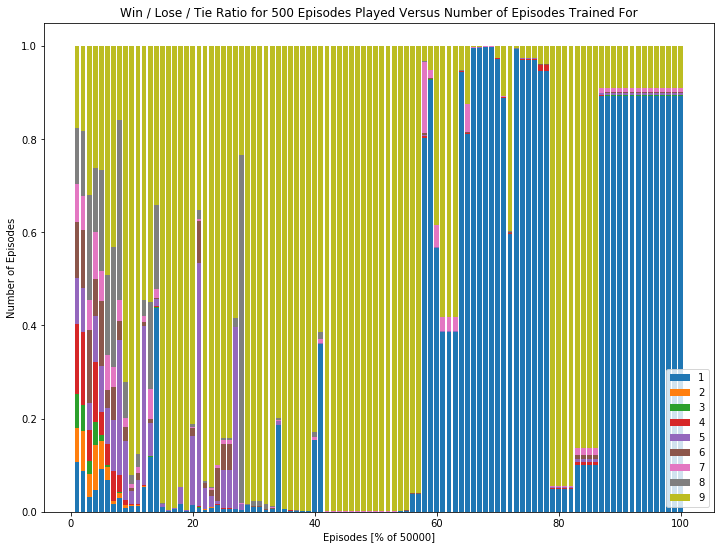

In [245]:
plt.figure(figsize=(12,9))
plt.xlabel("Episodes [% of 50000]")
plt.ylabel("Number of Episodes")
plt.title("Win / Lose / Tie Ratio for 500 Episodes Played Versus Number of Episodes Trained For")

plt.bar(episodes, move[0], label='1')
plt.bar(episodes, move[1], bottom=move1, label='2')
plt.bar(episodes, move[2], bottom=move2, label='3')
plt.bar(episodes, move[3], bottom=move3, label='4')
plt.bar(episodes, move[4], bottom=move4, label='5')
plt.bar(episodes, move[5], bottom=move5, label='6')
plt.bar(episodes, move[6], bottom=move6, label='7')
plt.bar(episodes, move[7], bottom=move7, label='8')
plt.bar(episodes, move[8], bottom=move8, label='9')

plt.legend()
plt.savefig("figures/moves_distr_graph_128.png", dpi=300, bbox_inches="tight")